In [1]:
using DataFrames
using CSV
using JSON
using Plots
using GraphRecipes

In [2]:
ENV["COLUMNS"] = 1000;

In [3]:
references_raw = JSON.parsefile("../rawdata/references_metadata_raw.json");

In [4]:
dois = collect(keys(references_raw));

In [5]:
references = Dict(d => [x["doi"] for x in references_raw[d] if !isnothing(x["doi"])] for d in dois);
references_internal = Dict(d => filter(x -> x in dois, references[d]) for d in dois)

Dict{String, Vector{T} where T} with 136 entries:
  "10.1038/s41598-020-77292-8"    => String[]
  "arxiv:2006.05955"              => String[]
  "10.1007/s11135-021-01207-6"    => ["10.1016/j.chaos.2020.110023", "10.1016/j.chaos.2020.110240"]
  "arxiv:2007.05180"              => ["10.1101/2020.03.21.20040303", "10.1101/2020.05.24.20111989"]
  "10.1101/2020.09.28.20203109"   => ["10.1101/2020.05.24.20111989"]
  "10.1101/2020.07.25.20162016"   => String[]
  "10.1016/j.chaos.2021.111227"   => String[]
  "10.1016/j.chaos.2020.110121"   => ["10.1016/j.chaos.2020.109924"]
  "10.1016/j.chaos.2020.110512"   => ["10.1016/j.chaos.2020.110196", "10.1016/j.chaos.2020.110227", "10.1016/j.chaos.2020.109948", "10.1016/j.chaos.2020.110248"]
  "10.1007/s11071-020-05946-3"    => String[]
  "10.1080/13658816.2021.1873999" => Any[]
  "10.1101/2020.03.27.20043752"   => String[]
  "arxiv:2004.14103"              => String[]
  "10.1038/s41598-021-92000-w"    => String[]
  "10.1016/j.chaos.2021.110922"   => ["

In [6]:
adj = [b in references_internal[a] for a in dois, b in dois];

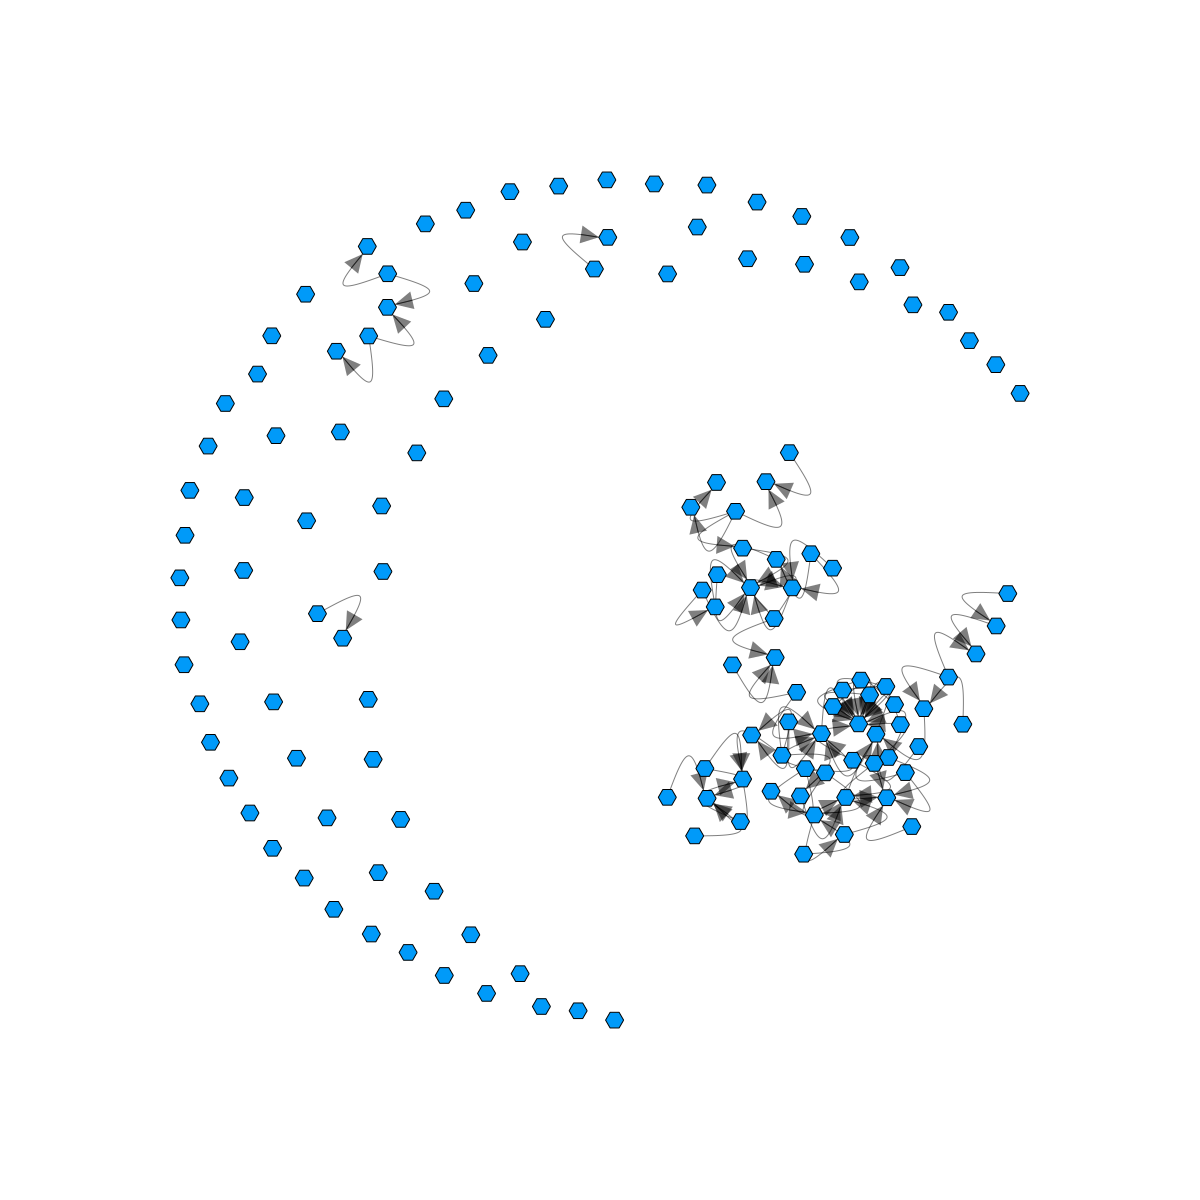

In [7]:
graphplot(adj, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, size=(1200, 1200))

In [8]:
dois_connected = String[]
for d in dois
    r = references_internal[d]
    if !isempty(r)
        push!(dois_connected, d)
        append!(dois_connected, r)
    end
end
dois_connected = unique(dois_connected);

In [9]:
connected_inds = [findfirst(==(d), dois) for d in dois_connected]
adj_connected = adj[connected_inds, connected_inds];

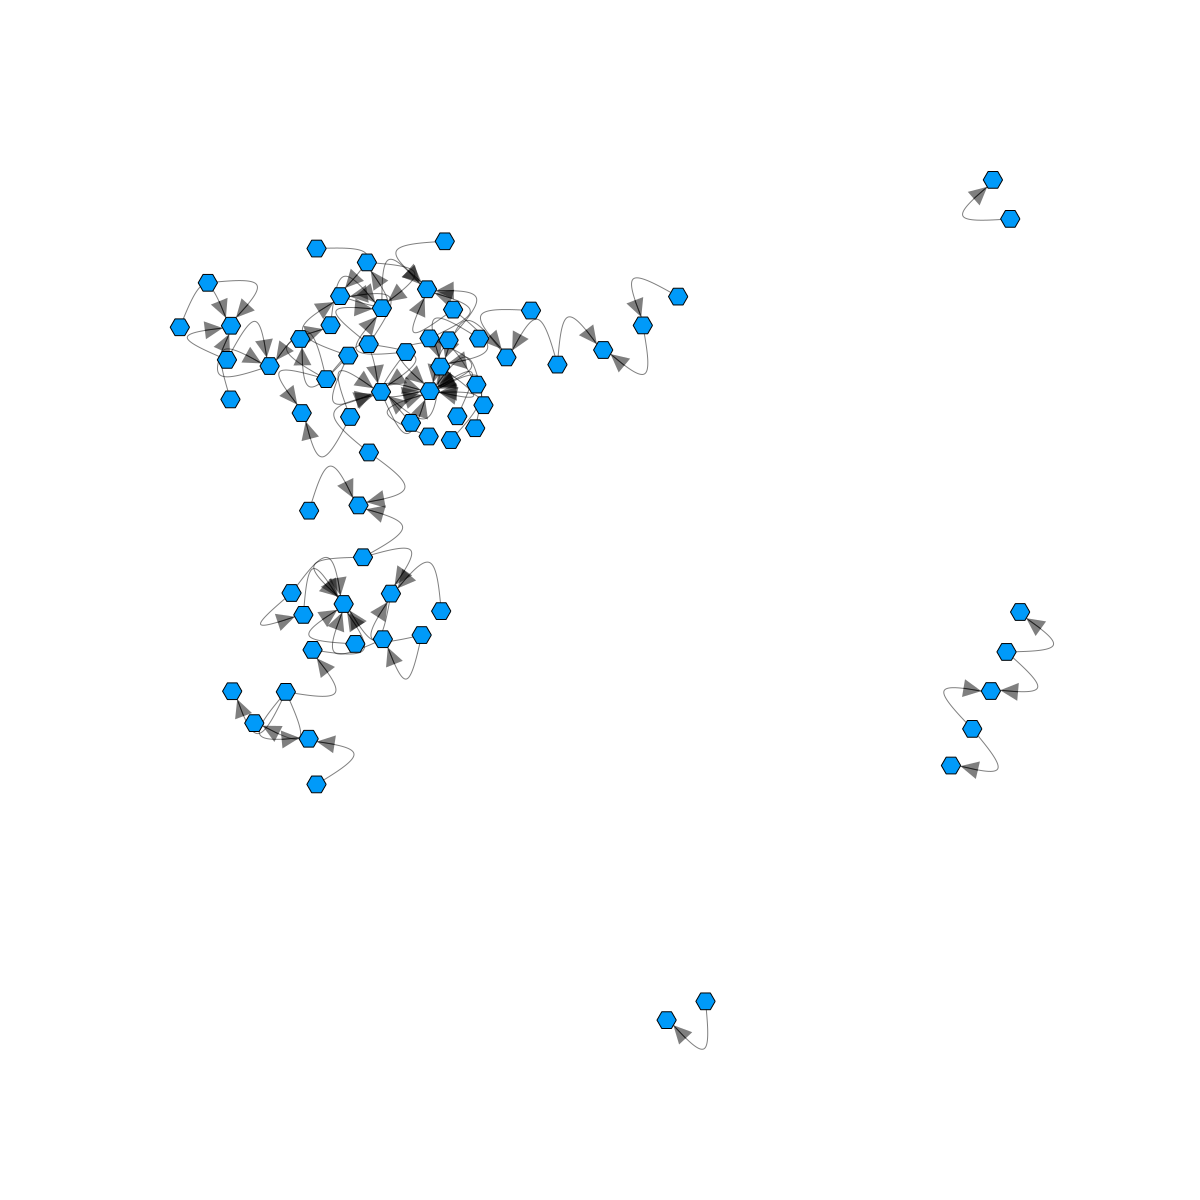

In [10]:
graphplot(adj_connected, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, size=(1200, 1200))

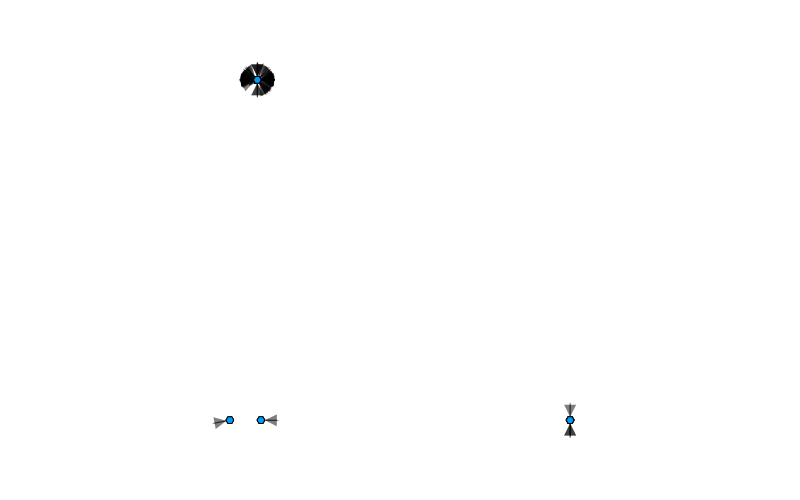

In [11]:
graphplot(adj_connected, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, method=:spectral, size=(800, 500))

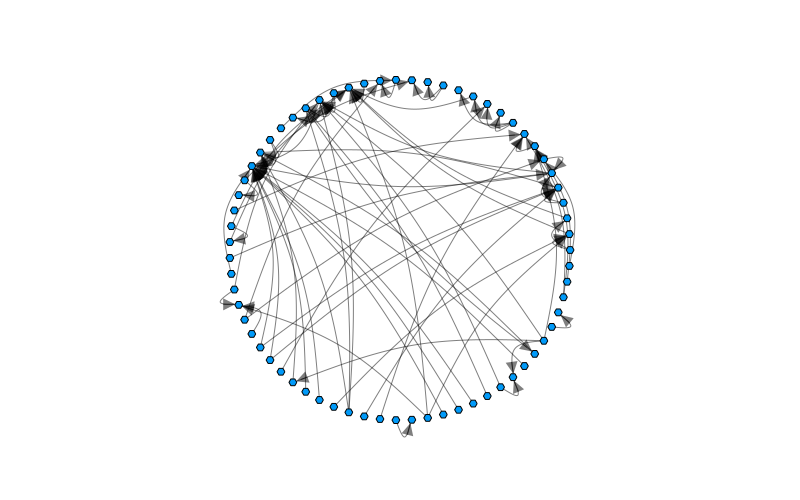

In [12]:
graphplot(adj_connected, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, method=:shell, size=(800, 500))

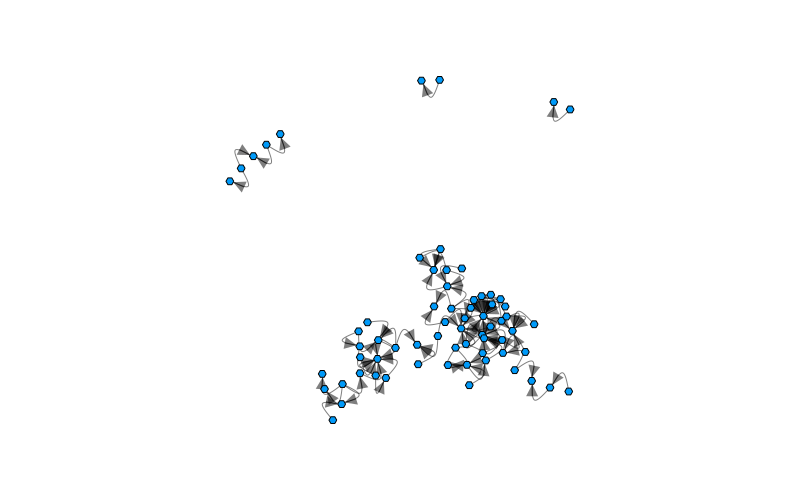

In [13]:
graphplot(adj_connected, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, method=:stress, size=(800, 500))

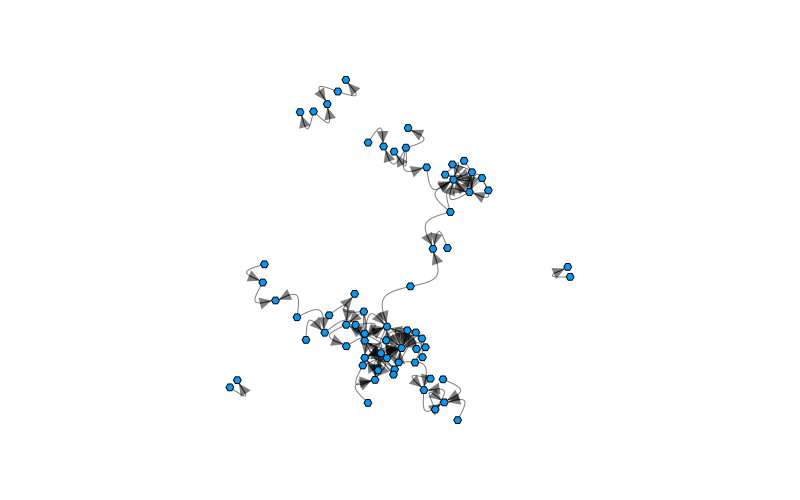

In [14]:
graphplot(adj_connected, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, method=:spring, size=(800, 500))

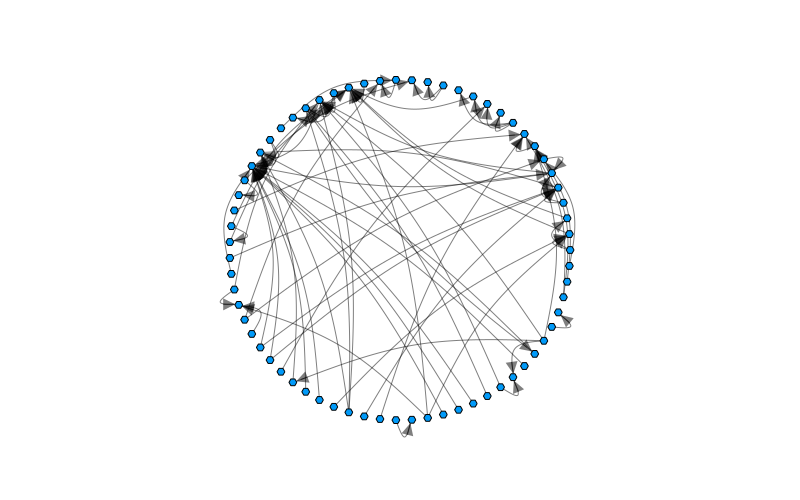

In [15]:
graphplot(adj_connected, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, method=:circular, size=(800, 500))

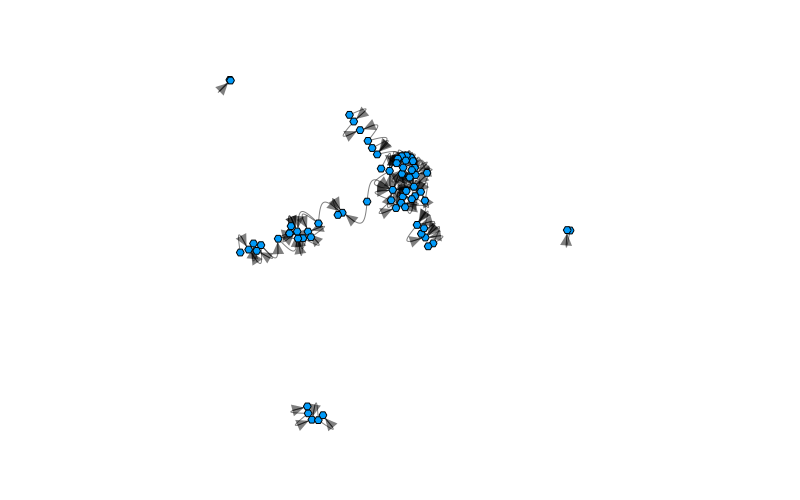

In [16]:
graphplot(adj_connected, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, method=:sfdp, size=(800, 500))

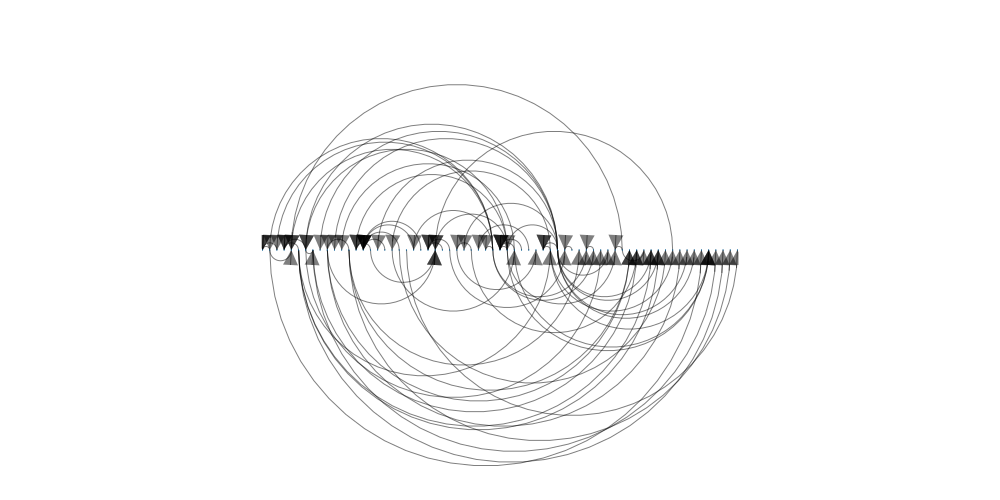

In [17]:
graphplot(adj_connected, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, method=:arcdiagram, size=(1000, 500))

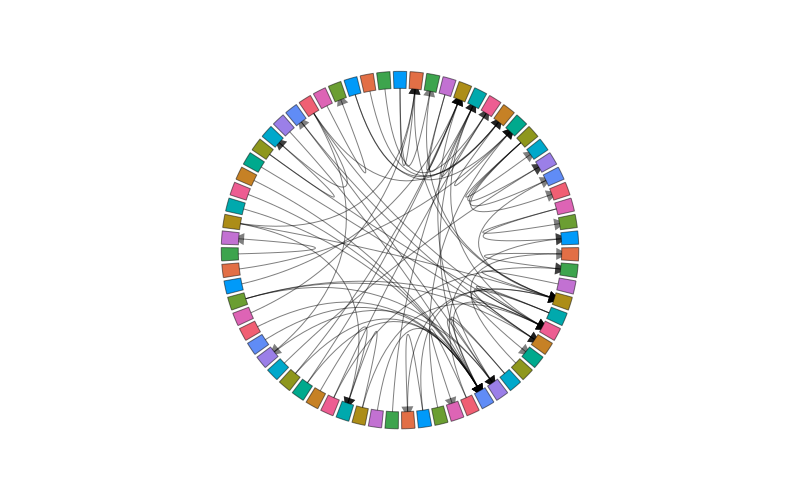

In [18]:
graphplot(adj_connected, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, method=:chorddiagram, size=(800, 500))

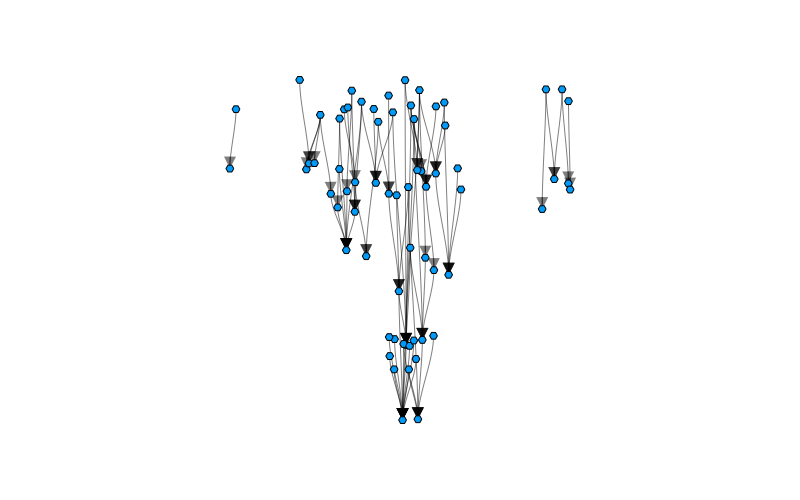

In [19]:
graphplot(adj_connected, markersize = 0.1, arrow=arrow(:closed, :head, 0.2, 0.2), linealpha = 0.5, method=:tree, size=(800, 500))